# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''matplotlib 패키지 한글 깨짐 처리'''
import platform
if platform.system() == 'Darwin':  # 맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows':  # 윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux':  # 리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 데이터 전처리

In [3]:
# csv 데이터 불러오기
mos = pd.read_csv('./data/mos.csv', encoding='CP949')
weather = pd.read_csv('./data/weather_data.csv', encoding='CP949')

mos.shape, weather.shape

((5132, 4), (875, 12))

In [4]:
display(mos.head())
display(weather.head())

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2022-05-24,99.3,39.8,42.9
1,2022-05-23,100.0,38.9,43.1
2,2022-05-22,98.7,40.8,41.3
3,2022-05-21,100.0,40.2,42.3
4,2022-05-20,99.3,39.2,41.6


,일시,평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C)
0,2020-01-01,-2.2,-6.5,0.3,2.6,0.6,37.0,64.4,1034.0,1031.2,1032.1,-0.9
1,2020-01-02,1.0,-0.7,3.8,4.0,1.2,54.0,65.4,1031.3,1028.2,1029.6,0.1
2,2020-01-03,-0.1,-3.4,4.6,3.5,1.7,26.0,56.9,1029.0,1025.8,1027.3,-0.4
3,2020-01-04,1.2,-2.8,6.1,4.5,1.9,32.0,50.8,1028.4,1024.4,1026.2,0.0
4,2020-01-05,1.3,-3.2,6.6,2.9,1.1,28.0,45.6,1032.6,1028.1,1030.6,-0.5


In [5]:
'''2020년~2022년까지 모지지수 발생일 데이터 수집'''

# 2020~2022년 데이터만 남기기
mos_filered = mos[mos['모기지수 발생일'].between('2020-01-01', '2022-05-24')].copy()

# 날짜 오름차순으로 데이터 정리
mos = mos_filered.sort_index(ascending=False).copy()
print(mos.shape)
display(mos)

(985, 4)


,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
984,2020-01-01,5.5,5.5,5.5
983,2020-01-02,5.5,5.5,5.5
982,2020-01-03,5.5,5.5,5.5
981,2020-01-04,5.5,5.5,5.5
980,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
4,2022-05-20,99.3,39.2,41.6
3,2022-05-21,100.0,40.2,42.3
2,2022-05-22,98.7,40.8,41.3
1,2022-05-23,100.0,38.9,43.1


In [6]:
# mos 중복값 제거
print('before:', mos.shape)
mos = mos.drop_duplicates(['모기지수 발생일'])
print('after:', mos.shape)

before: (985, 4)
after: (875, 4)


In [7]:
#인덱스 순서 정렬
mos = mos.reset_index(drop=True)
mos

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2020-01-01,5.5,5.5,5.5
1,2020-01-02,5.5,5.5,5.5
2,2020-01-03,5.5,5.5,5.5
3,2020-01-04,5.5,5.5,5.5
4,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
870,2022-05-20,99.3,39.2,41.6
871,2022-05-21,100.0,40.2,42.3
872,2022-05-22,98.7,40.8,41.3
873,2022-05-23,100.0,38.9,43.1


In [8]:
# mos '모기지수 발생일'과 weather '일시' 컬럼명을 '일시'로 통일
mos = mos.rename(columns={'모기지수 발생일': '일시'})
mos

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2020-01-01,5.5,5.5,5.5
1,2020-01-02,5.5,5.5,5.5
2,2020-01-03,5.5,5.5,5.5
3,2020-01-04,5.5,5.5,5.5
4,2020-01-05,5.5,5.5,5.5
...,...,...,...,...
870,2022-05-20,99.3,39.2,41.6
871,2022-05-21,100.0,40.2,42.3
872,2022-05-22,98.7,40.8,41.3
873,2022-05-23,100.0,38.9,43.1


In [9]:
mos.shape, weather.shape

((875, 4), (875, 12))

In [10]:
# 데이터 프레임 합치기
df = pd.merge(mos, weather)
df.head()

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C)
0,2020-01-01,5.5,5.5,5.5,-2.2,-6.5,0.3,2.6,0.6,37.0,64.4,1034.0,1031.2,1032.1,-0.9
1,2020-01-02,5.5,5.5,5.5,1.0,-0.7,3.8,4.0,1.2,54.0,65.4,1031.3,1028.2,1029.6,0.1
2,2020-01-03,5.5,5.5,5.5,-0.1,-3.4,4.6,3.5,1.7,26.0,56.9,1029.0,1025.8,1027.3,-0.4
3,2020-01-04,5.5,5.5,5.5,1.2,-2.8,6.1,4.5,1.9,32.0,50.8,1028.4,1024.4,1026.2,0.0
4,2020-01-05,5.5,5.5,5.5,1.3,-3.2,6.6,2.9,1.1,28.0,45.6,1032.6,1028.1,1030.6,-0.5


In [11]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 874
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일시            875 non-null    object 
 1   모기지수(수변부)     875 non-null    float64
 2   모기지수(주거지)     875 non-null    float64
 3   모기지수(공원)      875 non-null    float64
 4   평균기온(°C)      875 non-null    float64
 5   최저기온(°C)      875 non-null    float64
 6   최고기온(°C)      875 non-null    float64
 7   최대 풍속(m/s)    875 non-null    float64
 8   평균 풍속(m/s)    875 non-null    float64
 9   최소 상대습도(%)    875 non-null    float64
 10  평균 상대습도(%)    875 non-null    float64
 11  최고 해면기압(hPa)  874 non-null    float64
 12  최저 해면기압(hPa)  874 non-null    float64
 13  평균 해면기압(hPa)  874 non-null    float64
 14  평균 지면온도(°C)   875 non-null    float64
dtypes: float64(14), object(1)
memory usage: 109.4+ KB


In [12]:
# 날짜 데이터 타입 변경
df['일시'] = pd.to_datetime(df['일시'])
df['일시'].head(1)

0   2020-01-01
Name: 일시, dtype: datetime64[ns]

In [13]:
# 날짜 파생변수 만들기: 연, 월, 일, 연도-월
df["연도"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day
df["연도월"] = df["일시"].astype(str).str[:7]

df[['일시', '연도', '월', '일', '연도월']].head()

,일시,연도,월,일,연도월
0,2020-01-01,2020,1,1,2020-01
1,2020-01-02,2020,1,2,2020-01
2,2020-01-03,2020,1,3,2020-01
3,2020-01-04,2020,1,4,2020-01
4,2020-01-05,2020,1,5,2020-01


In [14]:
# 중복값 확인하기
df[df.duplicated()]

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일,연도월


In [15]:
# 결측치 확인
df.isnull().sum()

일시              0
모기지수(수변부)       0
모기지수(주거지)       0
모기지수(공원)        0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
최대 풍속(m/s)      0
평균 풍속(m/s)      0
최소 상대습도(%)      0
평균 상대습도(%)      0
최고 해면기압(hPa)    1
최저 해면기압(hPa)    1
평균 해면기압(hPa)    1
평균 지면온도(°C)     0
연도              0
월               0
일               0
연도월             0
dtype: int64

In [16]:
# 결측치 제거
df = df.dropna()
df.isnull().sum().sum()

0

# 기초통계

In [17]:
# 일부 정보 확인
df.head()

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일,연도월
0,2020-01-01,5.5,5.5,5.5,-2.2,-6.5,0.3,2.6,0.6,37.0,64.4,1034.0,1031.2,1032.1,-0.9,2020,1,1,2020-01
1,2020-01-02,5.5,5.5,5.5,1.0,-0.7,3.8,4.0,1.2,54.0,65.4,1031.3,1028.2,1029.6,0.1,2020,1,2,2020-01
2,2020-01-03,5.5,5.5,5.5,-0.1,-3.4,4.6,3.5,1.7,26.0,56.9,1029.0,1025.8,1027.3,-0.4,2020,1,3,2020-01
3,2020-01-04,5.5,5.5,5.5,1.2,-2.8,6.1,4.5,1.9,32.0,50.8,1028.4,1024.4,1026.2,0.0,2020,1,4,2020-01
4,2020-01-05,5.5,5.5,5.5,1.3,-3.2,6.6,2.9,1.1,28.0,45.6,1032.6,1028.1,1030.6,-0.5,2020,1,5,2020-01


In [18]:
# 일부 정보 확인
df.tail()

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일,연도월
870,2022-05-20,99.3,39.2,41.6,20.6,15.6,25.8,5.1,2.3,28.0,52.8,1016.3,1010.5,1013.1,26.6,2022,5,20,2022-05
871,2022-05-21,100.0,40.2,42.3,20.1,16.1,26.0,5.1,2.5,48.0,70.8,1011.9,1006.5,1009.0,27.1,2022,5,21,2022-05
872,2022-05-22,98.7,40.8,41.3,20.3,15.7,25.8,4.6,2.5,52.0,70.9,1009.3,1005.6,1007.5,27.6,2022,5,22,2022-05
873,2022-05-23,100.0,38.9,43.1,23.0,17.8,30.7,4.3,2.3,39.0,63.5,1014.6,1009.3,1011.5,30.2,2022,5,23,2022-05
874,2022-05-24,99.3,39.8,42.9,22.9,16.7,30.2,4.6,2.1,29.0,56.8,1016.2,1011.3,1013.5,30.8,2022,5,24,2022-05


In [19]:
df.sample(2)

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일,연도월
137,2020-05-17,83.8,34.7,50.1,19.1,14.6,24.9,4.3,1.7,58.0,80.1,1007.8,1002.9,1005.2,21.2,2020,5,17,2020-05
171,2020-06-20,122.5,50.8,73.2,24.9,20.7,29.7,4.6,2.1,48.0,62.6,1011.3,1008.0,1009.8,31.9,2020,6,20,2020-06


In [20]:
# 고유값 확인
df.nunique()

일시              874
모기지수(수변부)       277
모기지수(주거지)       380
모기지수(공원)        365
평균기온(°C)        349
최저기온(°C)        347
최고기온(°C)        332
최대 풍속(m/s)       65
평균 풍속(m/s)       38
최소 상대습도(%)       85
평균 상대습도(%)      389
최고 해면기압(hPa)    302
최저 해면기압(hPa)    315
평균 해면기압(hPa)    307
평균 지면온도(°C)     342
연도                3
월                12
일                31
연도월              29
dtype: int64

In [21]:
#데이터 요약
df.describe()

,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,60.169451,26.438215,31.205950,12.452288,8.357551,17.226201,4.869908,2.364188,42.630206,63.035812,1019.655721,1014.389588,1016.998398,13.881922,2020.747140,5.923341,15.624714
std,43.543995,19.657278,28.296026,10.166662,10.467691,10.169200,1.293618,0.670615,16.661967,14.485398,8.130969,8.466666,8.235412,10.841731,0.720441,3.472666,8.768298
min,0.000000,0.000000,0.000000,-14.900000,-18.600000,-10.700000,2.500000,0.600000,10.000000,17.900000,1000.700000,984.700000,992.800000,-9.300000,2020.000000,1.000000,1.000000
25%,30.400000,12.725000,5.500000,4.725000,0.425000,8.900000,3.900000,1.900000,30.000000,51.950000,1013.125000,1008.300000,1010.600000,3.700000,2020.000000,3.000000,8.000000
50%,45.800000,19.000000,21.600000,12.800000,7.900000,18.050000,4.700000,2.200000,40.000000,63.100000,1020.200000,1014.650000,1017.350000,13.850000,2021.000000,5.000000,16.000000
75%,100.000000,44.500000,55.875000,21.375000,17.800000,25.900000,5.600000,2.700000,52.000000,72.600000,1026.300000,1021.100000,1023.700000,23.400000,2021.000000,9.000000,23.000000
max,185.300000,76.800000,110.700000,31.700000,27.800000,36.500000,10.600000,5.000000,94.000000,98.100000,1038.400000,1033.500000,1035.600000,36.300000,2022.000000,12.000000,31.000000


# 데이터 시각화

## 상관관계

In [22]:
# 상관관계_상관계수
corr_df = df.corr(method='pearson')
corr_df

,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일
모기지수(수변부),1.000000,0.966129,0.940472,0.853773,0.868700,0.820270,0.026100,-0.010377,0.486461,0.477399,-0.757502,-0.690591,-0.729077,0.866456,-0.249703,0.330287,0.027983
모기지수(주거지),0.966129,1.000000,0.952815,0.880581,0.897749,0.844148,0.003699,-0.036710,0.505302,0.485654,-0.781906,-0.706306,-0.748520,0.889400,-0.219840,0.320961,0.029437
모기지수(공원),0.940472,0.952815,1.000000,0.815061,0.837777,0.773270,-0.021172,-0.046369,0.502554,0.465857,-0.733186,-0.655617,-0.698666,0.819714,-0.380121,0.321593,0.030687
평균기온(°C),0.853773,0.880581,0.815061,1.000000,0.988734,0.988268,-0.077471,-0.138076,0.424731,0.448060,-0.803102,-0.720152,-0.767656,0.974760,-0.165593,0.309916,0.034580
최저기온(°C),0.868700,0.897749,0.837777,0.988734,1.000000,0.959028,-0.066871,-0.109496,0.501821,0.511722,-0.818317,-0.736921,-0.783805,0.958926,-0.181919,0.322118,0.030022
최고기온(°C),0.820270,0.844148,0.773270,0.988268,0.959028,1.000000,-0.086551,-0.165028,0.329926,0.371167,-0.771837,-0.684690,-0.732934,0.971302,-0.143719,0.285918,0.038985
최대 풍속(m/s),0.026100,0.003699,-0.021172,-0.077471,-0.066871,-0.086551,1.000000,0.791302,-0.050753,-0.055396,-0.144968,-0.262107,-0.209536,-0.017848,0.047258,-0.127727,-0.030667
평균 풍속(m/s),-0.010377,-0.036710,-0.046369,-0.138076,-0.109496,-0.165028,0.791302,1.000000,-0.024573,-0.092006,-0.080102,-0.202245,-0.145663,-0.074628,0.046198,-0.129755,-0.016392
최소 상대습도(%),0.486461,0.505302,0.502554,0.424731,0.501821,0.329926,-0.050753,-0.024573,1.000000,0.908487,-0.488769,-0.493806,-0.497572,0.353152,-0.118224,0.301752,0.024100
평균 상대습도(%),0.477399,0.485654,0.465857,0.448060,0.511722,0.371167,-0.055396,-0.092006,0.908487,1.000000,-0.513021,-0.527549,-0.529313,0.372209,-0.112747,0.299084,0.005306


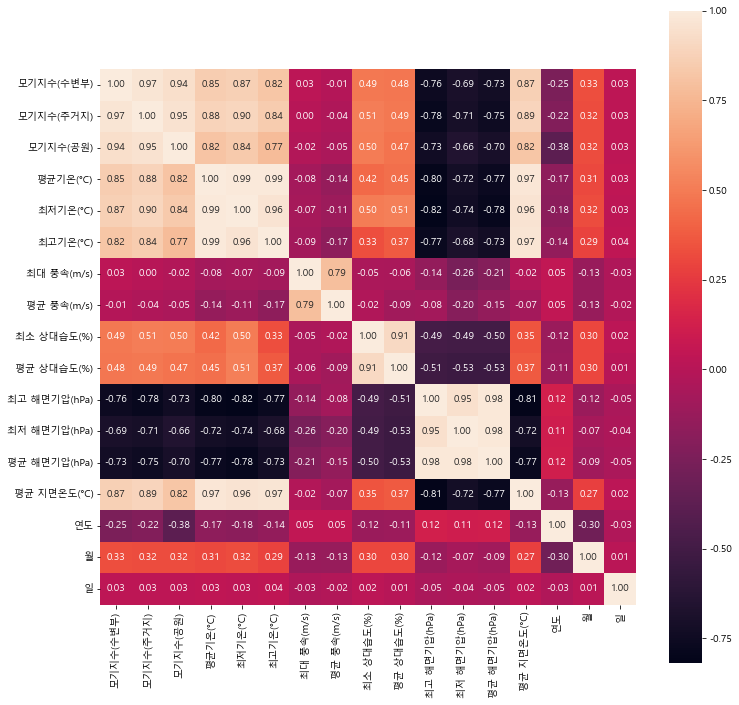

In [23]:
#상관관계 그래프
plt.figure(figsize=(12,12))
sns.heatmap(corr_df, annot=True, fmt='.2f', square=True)
plt.show()

## 시계열 그래프

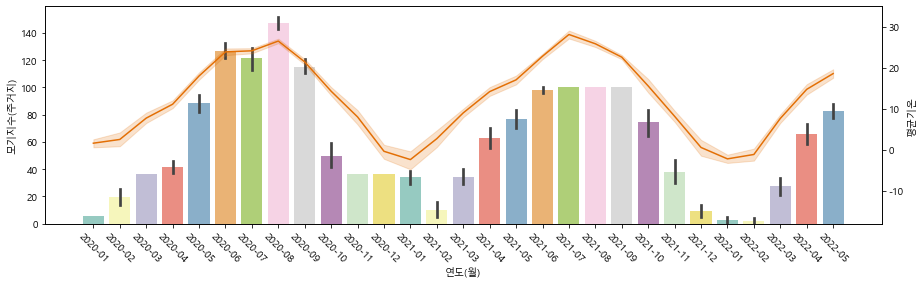

In [24]:
# 수변부 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation= -45)

ax1 = sns.barplot(x='연도월', y='모기지수(수변부)', data=df, palette='Set3')
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(주거지)')

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#E36F05' )
ax2.set_ylabel('평균기온')
ax2.set_ylim([-18, 35])

plt.show()

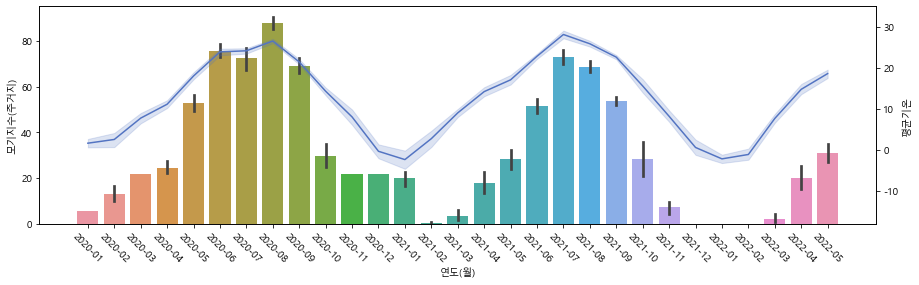

In [25]:
# 공원 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation= -45 )

ax1=sns.barplot(x='연도월', y='모기지수(공원)', data=df)
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(주거지)')

ax2=ax1.twinx()
ax2=sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#5374C2' )
ax2.set_ylabel('평균기온')
ax2.set_ylim([-18, 35])

plt.show()

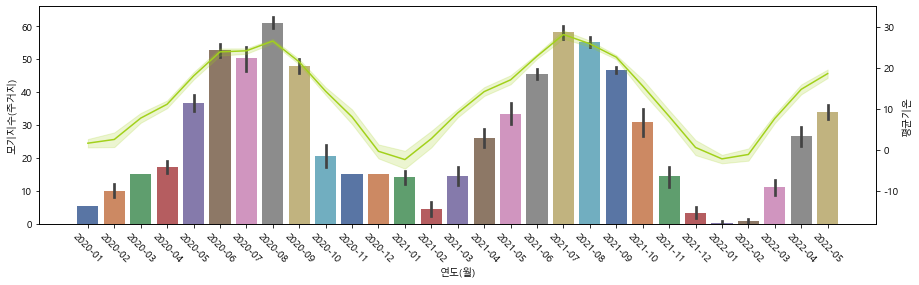

In [26]:
# 주거지 모기지수, 평균기온 시계열 그래프
plt.figure(figsize=(15,4))
plt.xticks(rotation= -45 )

ax1=sns.barplot(x='연도월', y='모기지수(주거지)', data=df, palette='deep')
ax1.set_xlabel('연도(월)')
ax1.set_ylabel('모기지수(주거지)')

ax2=ax1.twinx()
ax2=sns.lineplot(x='연도월', y='평균기온(°C)', data=df, color='#A2D11B' )
ax2.set_ylabel('평균기온')
ax2.set_ylim([-18, 35])

plt.show()

# 데이터셋 저장

In [27]:
#데이터 파일로 저장
file_name ="mosquito-weather.csv"

#csv파일로 저장
df.to_csv(file_name, index=False)

#저장한 파일 확인
pd.read_csv(file_name)

,일시,모기지수(수변부),모기지수(주거지),모기지수(공원),평균기온(°C),최저기온(°C),최고기온(°C),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),평균 지면온도(°C),연도,월,일,연도월
0,2020-01-01,5.5,5.5,5.5,-2.2,-6.5,0.3,2.6,0.6,37.0,64.4,1034.0,1031.2,1032.1,-0.9,2020,1,1,2020-01
1,2020-01-02,5.5,5.5,5.5,1.0,-0.7,3.8,4.0,1.2,54.0,65.4,1031.3,1028.2,1029.6,0.1,2020,1,2,2020-01
2,2020-01-03,5.5,5.5,5.5,-0.1,-3.4,4.6,3.5,1.7,26.0,56.9,1029.0,1025.8,1027.3,-0.4,2020,1,3,2020-01
3,2020-01-04,5.5,5.5,5.5,1.2,-2.8,6.1,4.5,1.9,32.0,50.8,1028.4,1024.4,1026.2,0.0,2020,1,4,2020-01
4,2020-01-05,5.5,5.5,5.5,1.3,-3.2,6.6,2.9,1.1,28.0,45.6,1032.6,1028.1,1030.6,-0.5,2020,1,5,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,2022-05-20,99.3,39.2,41.6,20.6,15.6,25.8,5.1,2.3,28.0,52.8,1016.3,1010.5,1013.1,26.6,2022,5,20,2022-05
870,2022-05-21,100.0,40.2,42.3,20.1,16.1,26.0,5.1,2.5,48.0,70.8,1011.9,1006.5,1009.0,27.1,2022,5,21,2022-05
871,2022-05-22,98.7,40.8,41.3,20.3,15.7,25.8,4.6,2.5,52.0,70.9,1009.3,1005.6,1007.5,27.6,2022,5,22,2022-05
872,2022-05-23,100.0,38.9,43.1,23.0,17.8,30.7,4.3,2.3,39.0,63.5,1014.6,1009.3,1011.5,30.2,2022,5,23,2022-05
